<a href="https://colab.research.google.com/github/vrishi220/MachineLearning/blob/master/MLhw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialize Functions and parameters

In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

batch_size, num_classes, epochs = 32,10,100

def getDG(x,y,x_te,y_te):
    datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            zca_epsilon=1e-06,  # epsilon for ZCA whitening
            rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
            # randomly shift images horizontally (fraction of total width)
            width_shift_range=0.1,
            # randomly shift images vertically (fraction of total height)
            height_shift_range=0.1,
            shear_range=0.,  # set range for random shear
            zoom_range=0.,  # set range for random zoom
            channel_shift_range=0.,  # set range for random channel shifts
            # set mode for filling points outside the input boundaries
            fill_mode='nearest',
            cval=0.,  # value used for fill_mode = "constant"
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False,  # randomly flip images
            # set rescaling factor (applied before any other transformation)
            rescale=None,
            # set function that will be applied on each input
            preprocessing_function=None,
            # image data format, either "channels_first" or "channels_last"
            data_format=None,
            # fraction of images reserved for validation (strictly between 0 and 1)
            validation_split=0.0)
    datagen.fit(x)

    for _ in range(10):
        for x_batch, y_batch in datagen.flow(x, y, batch_size=40000):
            model.fit(x_batch, y_batch); break

    History = model.fit(x, y,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_te, y_te))
    
    score = model.evaluate(x_te, y_te, verbose=0)
    
    plotaccuracy = plt.plot(range(1,epochs+1),History.history['acc'],range(1,epochs+1),History.history['val_acc'])
    plt.xlabel('Epochs'); plt.ylabel('Accuracy')
    plt.legend(('Train Accuracy','Test Accuracy'))
    plt.show(plotaccuracy)
    
    print('List of Historical val_loss Scores: {}\nList of Historical val_acc Scores: {}\nTest Loss: {}\nTest Accuracy: {}'.format(History.history['val_loss'],History.history['val_acc'],score[0],score[1]))

    return History.history
    
def getValOrTra(x,y,z=4): return np.array(x[z*10000:(z+1)*10000]), np.array(y[z*10000:(z+1)*10000]), np.array(x[0:z*10000]+x[(z+1)*10000:50000]), np.array(y[0:z*10000]+y[(z+1)*10000:50000])


## Train and validate Set 1

170500096/170498071 [==============================] - 32s 0us/step
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
40000/40000 [==============================] - 31s 763us/step - loss: 1.8944 - acc: 0.2883
Epoch 1/1
40000/40000 [==============================] - 25s 630us/step - loss: 1.5933 - acc: 0.4109
Epoch 1/1
40000/40000 [==============================] - 27s 666us/step - loss: 1.4771 - acc: 0.4579
Epoch 1/1
40000/40000 [==============================] - 22s 541us/step - loss: 1.3879 - acc: 0.4972
Epoch 1/1
40000/40000 [==============================] - 24s 612us/step - loss: 1.3221 - acc: 0.5245
Epoch 1/1
40000/40000 [==============================] - 25s 621us/step - loss: 1.2674 - acc: 0.5483
Epoch 1/1
40000/40000 [==============================] - 27s 675us/step - loss: 1.2152 - ac

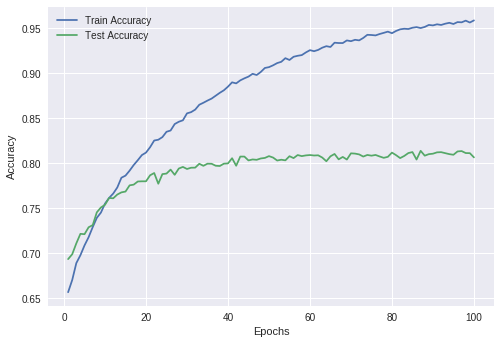

List of Historical val_loss Scores: [0.882071731376648, 0.8682602053642273, 0.8352979744911194, 0.8018004375457763, 0.798518020439148, 0.7764386159896851, 0.7745722578048706, 0.7286793813705444, 0.7141554023265838, 0.7067563424110412, 0.6888470134735107, 0.6889240659713746, 0.6775225653648377, 0.6654280843734741, 0.6721249609470368, 0.6478111045360565, 0.6526729455471039, 0.6317785116195679, 0.6342795989990234, 0.6321740441799164, 0.6204603248596191, 0.6290773442745209, 0.6550883545875549, 0.6179502161502838, 0.6210165309906006, 0.607110700750351, 0.6392301346778869, 0.6078775591850281, 0.6056222590446472, 0.6078882219791413, 0.6215192632198334, 0.6194809901714325, 0.6121566855430604, 0.6196546100139618, 0.6093497256755829, 0.6131140038967132, 0.6132268503665924, 0.6375555397033691, 0.6178679811000825, 0.6433530089855194, 0.6266313943862915, 0.6277115137577057, 0.6163205692291259, 0.6255393600940704, 0.6247051550388336, 0.6293509819984436, 0.6268573690414428, 0.635119154214859, 0.62202

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

val_loss, val_acc  = [],[]
x_train, x_test = list(x_train.astype('float32')/255), x_test.astype('float32')/255
y_train, y_test = list(keras.utils.to_categorical(y_train, num_classes)), keras.utils.to_categorical(y_test, num_classes)
x_val, y_val, x_t, y_t = getValOrTra(x_train, y_train)
  
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(lr=0.0001,decay=1e-6),metrics=['accuracy'])

h = getDG(x_t, y_t,x_val, y_val)
print('Validation Loss: {}\nValidation Accuracy: {}'.format(h['val_loss'][-1],h['val_acc'][-1]))

## Train and validate Set 2

Epoch 1/1
40000/40000 [==============================] - 20s 488us/step - loss: 1.8859 - acc: 0.3053
Epoch 1/1
40000/40000 [==============================] - 18s 445us/step - loss: 1.5977 - acc: 0.4108
Epoch 1/1
40000/40000 [==============================] - 18s 445us/step - loss: 1.4923 - acc: 0.4589
Epoch 1/1
40000/40000 [==============================] - 17s 426us/step - loss: 1.4220 - acc: 0.4812
Epoch 1/1
40000/40000 [==============================] - 17s 426us/step - loss: 1.3649 - acc: 0.5077
Epoch 1/1
40000/40000 [==============================] - 18s 442us/step - loss: 1.3072 - acc: 0.5312
Epoch 1/1
40000/40000 [==============================] - 17s 421us/step - loss: 1.2631 - acc: 0.5506
Epoch 1/1
40000/40000 [==============================] - 16s 406us/step - loss: 1.2238 - acc: 0.5637
Epoch 1/1
40000/40000 [==============================] - 17s 414us/step - loss: 1.1829 - acc: 0.5796
Epoch 1/1
40000/40000 [==============================] - 16s 412us/step - loss: 1.1540 - ac

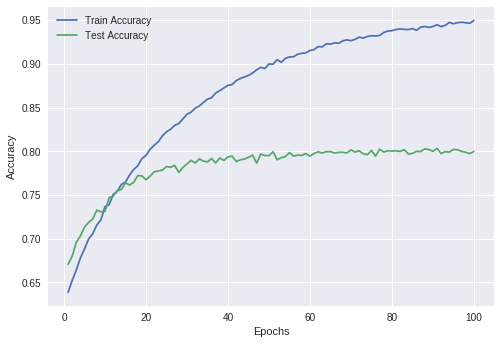

List of Historical val_loss Scores: [0.9409662349700928, 0.9137137903213501, 0.8824634198188782, 0.8537525417327881, 0.8299727284431457, 0.8137842661857605, 0.7964756401062012, 0.7775001156806945, 0.781547714138031, 0.7755323148727417, 0.7337470517158509, 0.7228361987113953, 0.7257743391036987, 0.705193035697937, 0.6943368609428405, 0.6917904096603393, 0.6827656536102295, 0.6672621481418609, 0.6654059913635254, 0.668108710193634, 0.6671972326278687, 0.6544481253147125, 0.6539558465003967, 0.6573940757751465, 0.6359965492248535, 0.6449379292488098, 0.636069349527359, 0.6587724210739135, 0.6428597406387329, 0.6438208344459534, 0.6331719808101655, 0.6370678562641143, 0.6250609498023987, 0.6290455971717834, 0.6479143151760102, 0.6391199915409088, 0.6527595193386078, 0.634232258605957, 0.6495357591629028, 0.6408442992210388, 0.6423755753040313, 0.6528188658237457, 0.6451190333366394, 0.6615115382194519, 0.6521396502494812, 0.645986213350296, 0.6895985944271088, 0.6548192878246307, 0.6492690

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

val_loss, val_acc  = [],[]
x_train, x_test = list(x_train.astype('float32')/255), x_test.astype('float32')/255
y_train, y_test = list(keras.utils.to_categorical(y_train, num_classes)), keras.utils.to_categorical(y_test, num_classes)
x_val, y_val, x_t, y_t = getValOrTra(x_train, y_train)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_t.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])

h = getDG(x_t, y_t,x_val, y_val)
print('Validation Loss: {}\nValidation Accuracy: {}'.format(h['val_loss'][-1],h['val_acc'][-1]))


## Train and validate Set 3

Epoch 1/1
40000/40000 [==============================] - 12s 288us/step - loss: 1.8832 - acc: 0.3167
Epoch 1/1
40000/40000 [==============================] - 11s 269us/step - loss: 1.6136 - acc: 0.4166
Epoch 1/1
40000/40000 [==============================] - 12s 290us/step - loss: 1.5204 - acc: 0.4482
Epoch 1/1
40000/40000 [==============================] - 11s 267us/step - loss: 1.4764 - acc: 0.4659
Epoch 1/1
40000/40000 [==============================] - 11s 268us/step - loss: 1.4349 - acc: 0.4842
Epoch 1/1
40000/40000 [==============================] - 11s 268us/step - loss: 1.4017 - acc: 0.4974
Epoch 1/1
40000/40000 [==============================] - 11s 266us/step - loss: 1.3718 - acc: 0.5110
Epoch 1/1
40000/40000 [==============================] - 11s 271us/step - loss: 1.3451 - acc: 0.5172
Epoch 1/1
40000/40000 [==============================] - 11s 269us/step - loss: 1.3240 - acc: 0.5261
Epoch 1/1
40000/40000 [==============================] - 11s 267us/step - loss: 1.3021 - ac

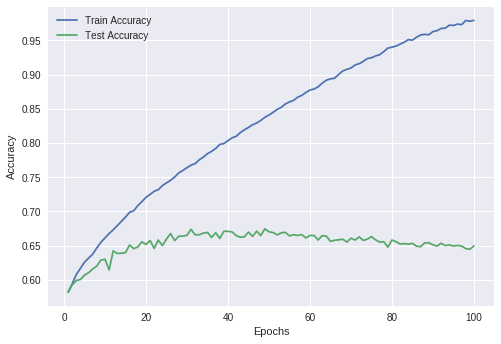

List of Historical val_loss Scores: [1.1939269886016846, 1.1702600296020509, 1.1430727224349975, 1.1495855522155762, 1.1191526033401489, 1.1083103254318238, 1.0950357215881348, 1.092190550994873, 1.074554411125183, 1.0619138019561767, 1.098994653892517, 1.0380435354232789, 1.042289093017578, 1.0327107681274414, 1.0331612985610963, 1.0146060146331788, 1.03200808467865, 1.010595598602295, 1.0174374758720397, 1.0212264385223389, 1.011211170768738, 1.0246240077972413, 0.9961204060554505, 1.0263228459358216, 1.025822396850586, 0.9921354082107544, 0.998694356918335, 0.9985524921417236, 0.9968575675964355, 1.0073473925590515, 1.0000021180152894, 1.0091218353271485, 1.0078794399261475, 1.0117856719970704, 1.0202727685928346, 1.025235173034668, 1.0207030467987062, 1.0438210815429687, 1.017070938014984, 1.0220983419418335, 1.023165606021881, 1.055615368938446, 1.0714293552398682, 1.0571082794189453, 1.0522605014801025, 1.0756162804603577, 1.066832737827301, 1.0821289325714112, 1.0673808026313782

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

val_loss, val_acc  = [],[]
x_train, x_test = list(x_train.astype('float32')/255), x_test.astype('float32')/255
y_train, y_test = list(keras.utils.to_categorical(y_train, num_classes)), keras.utils.to_categorical(y_test, num_classes)
x_val, y_val, x_t, y_t = getValOrTra(x_train, y_train)
  
model = keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=x_t.shape[1:]))
model.add(AveragePooling2D())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=10, activation = 'softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])

h = getDG(x_t, y_t,x_val, y_val)
print('Validation Loss: {}\nValidation Accuracy: {}'.format(h['val_loss'][-1],h['val_acc'][-1]))

## Train and validate Set 4

Epoch 1/1
40000/40000 [==============================] - 19s 466us/step - loss: 1.9629 - acc: 0.2556
Epoch 1/1
40000/40000 [==============================] - 18s 456us/step - loss: 1.7013 - acc: 0.3628
Epoch 1/1
40000/40000 [==============================] - 18s 451us/step - loss: 1.5856 - acc: 0.4084
Epoch 1/1
40000/40000 [==============================] - 18s 445us/step - loss: 1.5051 - acc: 0.4433
Epoch 1/1
40000/40000 [==============================] - 18s 452us/step - loss: 1.4312 - acc: 0.4760
Epoch 1/1
40000/40000 [==============================] - 18s 448us/step - loss: 1.3771 - acc: 0.4988
Epoch 1/1
40000/40000 [==============================] - 18s 448us/step - loss: 1.3315 - acc: 0.5184
Epoch 1/1
40000/40000 [==============================] - 18s 449us/step - loss: 1.2897 - acc: 0.5328
Epoch 1/1
40000/40000 [==============================] - 18s 451us/step - loss: 1.2438 - acc: 0.5524
Epoch 1/1
40000/40000 [==============================] - 18s 445us/step - loss: 1.2086 - ac

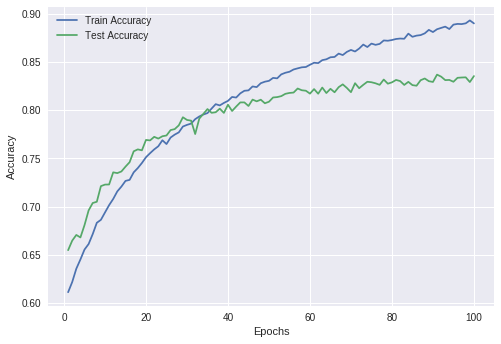

List of Historical val_loss Scores: [0.983726577758789, 0.9549855725288391, 0.9262779230117798, 0.9304252107620239, 0.8996919016838074, 0.8705398992538452, 0.840922049999237, 0.8398494292259217, 0.8022272422790527, 0.7903120349884033, 0.791380417728424, 0.755073176765442, 0.7522663250923157, 0.7519915767669678, 0.7345146744728088, 0.7172608438491821, 0.6922049025535584, 0.6866650938987732, 0.6904842461585998, 0.6643805980205536, 0.6621910654067993, 0.6495873515129089, 0.645428092098236, 0.6428533473014831, 0.6395916088581085, 0.6302932351112366, 0.6197854080677032, 0.6161602409362793, 0.5992168514251709, 0.6033702460765838, 0.6110119361400604, 0.6504422181129456, 0.5965900032997131, 0.5846799528121949, 0.5772622513771057, 0.5888594381809235, 0.5753950770378112, 0.569571066236496, 0.5830170555591583, 0.5572759875297546, 0.5795576106071472, 0.5586999551296234, 0.5610482722759247, 0.550512107372284, 0.5696686589241028, 0.5467460613727569, 0.5466032202243805, 0.5490322527885437, 0.55825972

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

val_loss, val_acc  = [],[]
x_train, x_test = list(x_train.astype('float32')/255), x_test.astype('float32')/255
y_train, y_test = list(keras.utils.to_categorical(y_train, num_classes)), keras.utils.to_categorical(y_test, num_classes)
x_val, y_val, x_t, y_t = getValOrTra(x_train, y_train)
  
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_t.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (2, 2), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])

h = getDG(x_t, y_t,x_val, y_val)
print('Validation Loss: {}\nValidation Accuracy: {}'.format(h['val_loss'][-1],h['val_acc'][-1]))

## Best Architecture (Architecture Four) Training and Test set

Epoch 1/1
40000/40000 [==============================] - 19s 473us/step - loss: 1.9489 - acc: 0.2608
Epoch 1/1
40000/40000 [==============================] - 18s 449us/step - loss: 1.6706 - acc: 0.3775
Epoch 1/1
40000/40000 [==============================] - 18s 447us/step - loss: 1.5621 - acc: 0.4226
Epoch 1/1
40000/40000 [==============================] - 18s 445us/step - loss: 1.4895 - acc: 0.4522
Epoch 1/1
40000/40000 [==============================] - 18s 448us/step - loss: 1.4205 - acc: 0.4819
Epoch 1/1
40000/40000 [==============================] - 18s 448us/step - loss: 1.3624 - acc: 0.5054
Epoch 1/1
40000/40000 [==============================] - 18s 448us/step - loss: 1.3116 - acc: 0.5248
Epoch 1/1
40000/40000 [==============================] - 18s 452us/step - loss: 1.2729 - acc: 0.5407
Epoch 1/1
40000/40000 [==============================] - 18s 448us/step - loss: 1.2336 - acc: 0.5552
Epoch 1/1
40000/40000 [==============================] - 18s 446us/step - loss: 1.2016 - ac

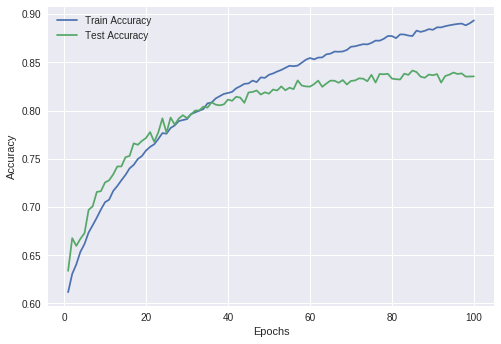

List of Historical val_loss Scores: [1.0277212949752808, 0.9420551067352295, 0.95685198802948, 0.9315909061431885, 0.930667636680603, 0.8522152415275573, 0.8409134767532349, 0.8143614946365356, 0.7995669457435608, 0.7845971652984619, 0.7693721312522889, 0.7671540156364441, 0.7431214114189147, 0.7384281099319459, 0.707092830657959, 0.7209742942333222, 0.686418976020813, 0.6878222107410431, 0.677937083864212, 0.6602392866134643, 0.6451517573833465, 0.6635494901657104, 0.6377616643905639, 0.6119357989788056, 0.6422763941764832, 0.605617069721222, 0.6219826741933823, 0.6039070777654648, 0.6039778290271759, 0.6012070306062698, 0.5912865002155304, 0.5789583972930908, 0.5773908595561981, 0.572256144618988, 0.5723578285694122, 0.5568399743795395, 0.5696090419769287, 0.5700336885929108, 0.5647220402240754, 0.5596462676525116, 0.5500049854278565, 0.550009610080719, 0.5482635624647141, 0.5716436515808105, 0.5323175466775895, 0.5400289244890213, 0.5319550101280213, 0.5378340107917786, 0.5398431974

In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train.astype('float32')/255, x_test.astype('float32')/255
y_train, y_test = keras.utils.to_categorical(y_train, num_classes), keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (2, 2), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])

h = getDG(x_train, y_train,x_test, y_test)
print('Test Loss: {}\nTest Accuracy: {}'.format(h['val_loss'][-1],h['val_acc'][-1]))

## Best Architecture (Architecture Four) K-Fold Training and Validation set

Epoch 1/1
40000/40000 [==============================] - 19s 481us/step - loss: 1.9931 - acc: 0.2414
Epoch 1/1
40000/40000 [==============================] - 18s 450us/step - loss: 1.6819 - acc: 0.3779
Epoch 1/1
40000/40000 [==============================] - 18s 450us/step - loss: 1.5649 - acc: 0.4217
Epoch 1/1
40000/40000 [==============================] - 18s 447us/step - loss: 1.4868 - acc: 0.4528
Epoch 1/1
40000/40000 [==============================] - 18s 452us/step - loss: 1.4186 - acc: 0.4860
Epoch 1/1
40000/40000 [==============================] - 18s 451us/step - loss: 1.3663 - acc: 0.5059
Epoch 1/1
40000/40000 [==============================] - 18s 447us/step - loss: 1.3171 - acc: 0.5218
Epoch 1/1
40000/40000 [==============================] - 18s 451us/step - loss: 1.2682 - acc: 0.5448
Epoch 1/1
40000/40000 [==============================] - 18s 452us/step - loss: 1.2296 - acc: 0.5610
Epoch 1/1
40000/40000 [==============================] - 18s 461us/step - loss: 1.1968 - ac

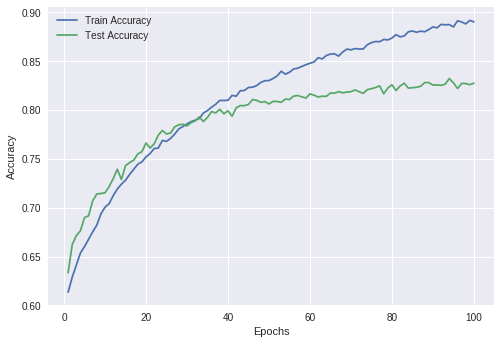

List of Historical val_loss Scores: [1.030284854698181, 0.940058716392517, 0.9208563199043274, 0.9044236129760742, 0.8705722416877747, 0.8606572840690613, 0.828278800201416, 0.8076544910430908, 0.7997752309799194, 0.8049350648880005, 0.7855927992820739, 0.7762399008750915, 0.7366866815567017, 0.7656667847633362, 0.7198871382713318, 0.7143995717048645, 0.7161835835456848, 0.69875935754776, 0.6924987942695617, 0.6718330445289612, 0.6735719532966614, 0.6680816182136535, 0.6466593168258667, 0.6255405381202698, 0.6309017944335937, 0.6370255766868591, 0.627301955127716, 0.6105761723041534, 0.617652353143692, 0.6258825890541077, 0.6121994808197021, 0.6092401386260986, 0.592998331785202, 0.600245874929428, 0.5924761032581329, 0.5764981369018555, 0.5837480400562286, 0.5750309583663941, 0.5844149740219117, 0.5705740898609162, 0.5962250435829163, 0.5745487475395202, 0.5634609763622284, 0.5602026747226715, 0.5589844871044158, 0.5561429328441619, 0.5450938516616821, 0.5513441370964051, 0.5551821332

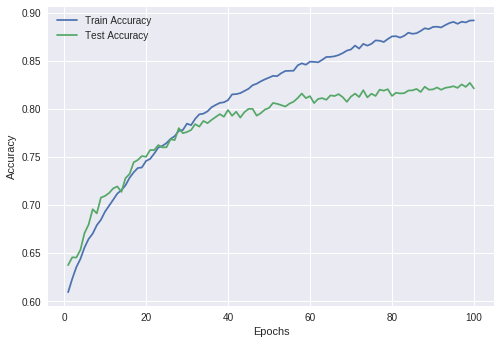

List of Historical val_loss Scores: [1.0137827238082886, 0.989988267326355, 0.9786239503860473, 0.9665742799758911, 0.9233384143829346, 0.8957082063674927, 0.8562266739845276, 0.8693740999221802, 0.8224316082954407, 0.8192470552444459, 0.808103571844101, 0.7882245760917663, 0.7901318147659302, 0.8083027309417724, 0.7642992984771728, 0.7483223582267762, 0.7292199581623078, 0.7174963399887085, 0.707890792274475, 0.6939357655525208, 0.6921570097446441, 0.6899560191631318, 0.6755396803379059, 0.6889937926769256, 0.6784788542747497, 0.6609006516456604, 0.6706450006961823, 0.6387690139770508, 0.6513581316947937, 0.648172998714447, 0.6447533630371094, 0.6207940761089324, 0.6166274423599243, 0.6124543643951416, 0.6162109736442566, 0.615866865682602, 0.6058019881725312, 0.6044146173000335, 0.6019982141494751, 0.5902304303646088, 0.6017095227241516, 0.5996628338336945, 0.6097642894744874, 0.5894420476913452, 0.5856971028327942, 0.5791912942886352, 0.5915243081569672, 0.594789224910736, 0.5818495

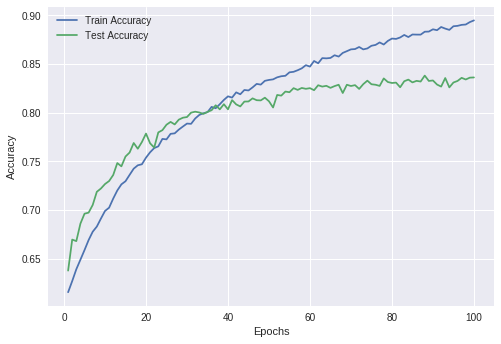

List of Historical val_loss Scores: [1.0146134923934937, 0.9483260225296021, 0.9355641280174255, 0.8862481372833252, 0.8618638393402099, 0.8550508908748626, 0.8337125858783722, 0.7992945908546448, 0.7963157104492188, 0.7767170216560364, 0.7652478146076203, 0.7421428392410279, 0.7162659323692322, 0.7248629839658737, 0.7089339941263199, 0.6871356313705445, 0.6595780436992645, 0.6714122821807861, 0.6502942610740662, 0.6390165693283081, 0.6490206914424896, 0.659468668794632, 0.6328391501903534, 0.6256301583528519, 0.6110234038352966, 0.6021264087200164, 0.6046475292682648, 0.594996790599823, 0.5928935111045838, 0.588954469370842, 0.581019936299324, 0.5740582175254821, 0.5696073740959168, 0.580350557732582, 0.5658019371271134, 0.5728224500894546, 0.5585772580385208, 0.5685794170618057, 0.5578782575130463, 0.5689929830312729, 0.5428439522743225, 0.5476865761160851, 0.5486458065748214, 0.541026044511795, 0.5486661645889283, 0.5338727947711944, 0.543851046705246, 0.5350534902334213, 0.53920265

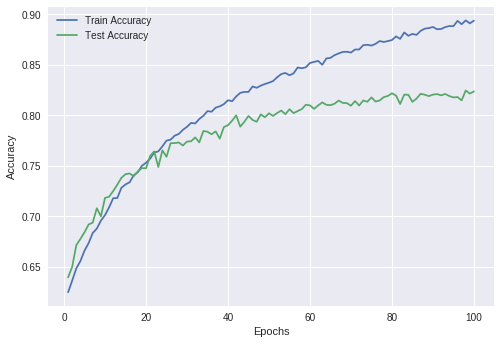

List of Historical val_loss Scores: [1.012944324684143, 0.9814115127563476, 0.9324185176849366, 0.9058889142990112, 0.8866870281219482, 0.8745767509460449, 0.8600993318557739, 0.8263667524337769, 0.8597037481307983, 0.8027480793952941, 0.7949432338714599, 0.7762133243560791, 0.765362037563324, 0.7506767729759216, 0.741388214302063, 0.7277728680610657, 0.7376027031898499, 0.7197721793174744, 0.7169419006347656, 0.7197434849739075, 0.6854221756935119, 0.6757189049720764, 0.7164279767990113, 0.6666717316150665, 0.6794301500797272, 0.6502989514350891, 0.650133770942688, 0.6493639277458191, 0.6539530935287475, 0.6503918917655945, 0.6403113254547119, 0.641301780796051, 0.6428736044406891, 0.6172431098461151, 0.62791800365448, 0.6279036563396454, 0.6177354351043701, 0.6397444404602051, 0.6113634641170502, 0.6027249981880188, 0.5910844350337983, 0.5827384195804596, 0.6089768594741821, 0.5981936622619629, 0.5788532719612122, 0.5964301583766938, 0.5995659123420716, 0.5869527591228485, 0.58676604

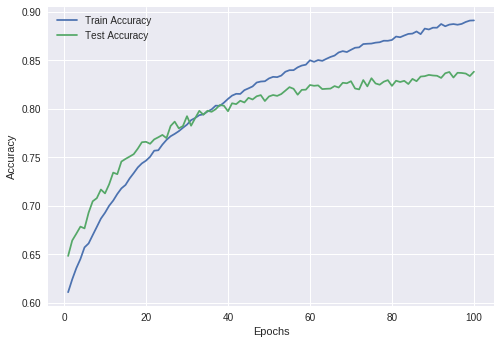

List of Historical val_loss Scores: [1.0010703031539916, 0.9638104491233825, 0.925230668258667, 0.9094602685928345, 0.9178922147750854, 0.8659098868370056, 0.8473049031257629, 0.8366396894454956, 0.8159728482246399, 0.8164272319793702, 0.7828194712638855, 0.7579392086982727, 0.7563145140647888, 0.726732468700409, 0.7203294327735901, 0.7100967541694642, 0.7022869187355042, 0.6895364151000977, 0.6800990341663361, 0.6674877252101898, 0.6783398946285247, 0.6735361813545228, 0.6524331191062928, 0.6460316911697388, 0.6676744871139526, 0.6214101994037629, 0.6110326434135437, 0.6314889441013336, 0.6174363892555237, 0.5934552892684937, 0.6191911282539367, 0.5926849859714508, 0.5837129812717438, 0.5863472687721253, 0.58237573595047, 0.5806539324283599, 0.5718409892559051, 0.5663622765541076, 0.5638498451232911, 0.5794524408340455, 0.5569920514583587, 0.5625319309234619, 0.5527535717010498, 0.5526205927371979, 0.5442043362140655, 0.5495537395000458, 0.5372519587516784, 0.534611458683014, 0.557923

In [10]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

average_val, val_loss, val_acc  = [0,0],[],[]
x_train, x_test = list(x_train.astype('float32')/255), x_test.astype('float32')/255
y_train, y_test = list(keras.utils.to_categorical(y_train, num_classes)), keras.utils.to_categorical(y_test, num_classes)

for i in range(5):
  x_val, y_val, x_t, y_t = getValOrTra(x_train, y_train, i)
  
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_t.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(128, (2, 2), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(128, (2, 2)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(1024))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])

  h = getDG(x_t, y_t,x_val, y_val)
  val_loss.append(h['val_loss'][-1]);val_acc.append(h['val_acc'][-1])

for i in range(5): average_val[0] += val_loss[i]/5; average_val[1] += val_acc[i]/5
print('Average Validation Loss: {}\nAverage Validation Accuracy: {}'.format(average_val[0],average_val[1]))